YAPAY SİNİR AĞLARI

- insan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.
-  sinir ağları bir araya gelerek bir araya gelerek sistemi oluşturur.
- "çok katmanlı ağ" olarak da adlandırılır.
- Ağın yapısına karar verilir.
- Doğrusal değişkenler ,doğrusal olmayan değişkenlerden türetilmektedir.
- Girdiler ve çıktılar üzerinden olabilicek en min hatayı bulmayı amaçlar
- overfit olmaya meyillidir.bundan kurtulamk için birçok yol denenir.
-


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
import numpy as np
import pandas as pd
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [5]:
X_train_scaled = scaler.transform(X_train)

In [6]:
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.neural_network import MLPRegressor

In [8]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [10]:
mlp_model.n_layers_

4

In [11]:
mlp_model.hidden_layer_sizes

(100, 20)

In [12]:
#tahmin
mlp_model.predict(X_train_scaled)[0:5]

array([108.82672981, 425.43814502, 292.0168961 ,  94.73193404,
        65.88709715])

In [13]:
y_pred = mlp_model.predict(X_test_scaled)

In [14]:
np.sqrt(mean_squared_error(y_test,y_pred))

428.98653796779854

In [15]:
#model tuning
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [16]:
mlp_params = {'alpha':[0.1,0.01,0.02,0.005],'hidden_layer_sizes':[(20,20),(100,50,150),(300,200,150)],'activation':['relu','logistic']}

In [17]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=10)

In [18]:
##mlp_cv_model.fit(X_train_scaled, y_train)

In [19]:
mlp_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
mlp_tuned = MLPRegressor(alpha=0.02,hidden_layer_sizes=(100,50,150))

In [ ]:
mlp_tuned.fit(X_train_scaled,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

350.19585231657385

CLASSİFİCATİON AND REGRESSİON TREES(CART)(KARAR AĞAÇLARI)

- amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektedir.
- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.
- genel olarak belirli koşullarla ağaç yapısı üzerinden kısıtlamalar yer alır ve duruma göre ksııtlar takip edilerek sonuca ulaşılır.
- overfitting durumu burada da mevcuttur.
- karmaşıklık parametresi yer alır ve belli bir noktada dallanmaları durdurur.


In [ ]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [ ]:
cart_model

DecisionTreeRegressor(max_leaf_nodes=10)

In [ ]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_1692/1457480431.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


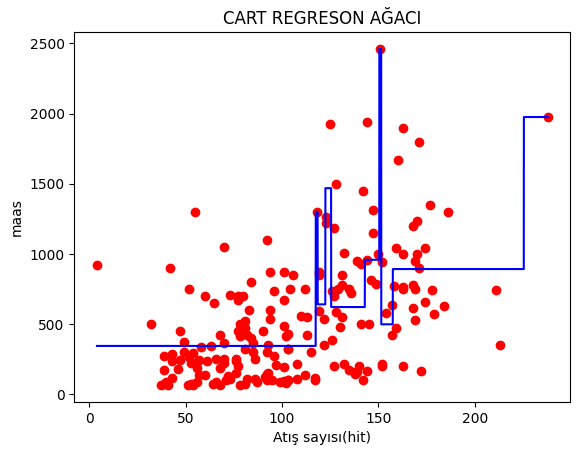

In [ ]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_grid,cart_model.predict(X_grid),color = 'blue')
plt.title('CART REGRESON AĞACI')
plt.xlabel('Atış sayısı(hit)')
plt.ylabel("maas");

In [ ]:
!pip install skompiler


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install astor


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from skompiler import skompile

In [ ]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



In [ ]:
#Tahmin
x = [91]
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [ ]:
cart_model.predict(X_test)[0:10]


array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517, 345.20115517, 892.54024138, 958.61111111,
       892.54024138, 345.20115517])

In [ ]:
cart_model.predict([[91]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([345.20115517])

In [ ]:
y_pred = cart_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [21]:

cart_model = DecisionTreeRegressor()
cart_model.fit(X_train,y_train)
y_pred = cart_model.predict(X_test)



In [22]:
np.sqrt(mean_squared_error(y_test,y_pred))

476.92392802942396

In [23]:
cart_params = {"min_sample_split": range(2,100), "max_leaf_nodes": range(2,10)}

In [24]:
cart_cv_model = GridSearchCV(cart_model, cart_params ,cv=10)

In [ ]:
#cart_cv_model.fit(X_train,y_train)

In [26]:
cart_cv_model

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_sample_split': range(2, 100)})

In [30]:
cart_cv_model.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_sample_split': range(2, 100)})>

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
cart_model = DecisionTreeRegressor(max_leaf_nodes=2)

# Define the parameter grid with the correct parameter name
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]  # Corrected to 'min_samples_split'
}

# Set up GridSearchCV with the model and parameters
cart_cv_model = GridSearchCV(cart_model, param_grid=param_grid, cv=5)

# Fit the model to the training data
cart_cv_model.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_leaf_nodes=2),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [33]:
cart_cv_model.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [34]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=76)

In [35]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [36]:
y_pred = cart_tuned.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

408.8749752940185

BAGGING

- temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- çalışma prensibi : t adet ağaç oluşturulur ve n'er adet gözlem(n < m) olacak şekilde seçilir.sonuç olarak t adet tahmin değeri bir araya gelmiş olur.
 

In [3]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train,y_train)

BaggingRegressor(bootstrap_features=True)

In [7]:
bag_model.n_estimators

10

In [10]:
bag_model.estimator_

DecisionTreeRegressor()

In [12]:
bag_model.estimators_samples_

[array([151,  75, 178, 183,  42,  83,  77,  84, 153,  42,  35,  19, 161,
         10,  90,  67, 179,  63,  31, 163,  17,  49, 180,  27, 136, 136,
        189,  20, 110, 100, 129,  69, 132, 182,  18, 162,  35,  69, 190,
        171, 165, 146, 189, 143,  11, 143,  99,  86, 140,  99, 114,  77,
         98,  81,  66, 186, 124,  52,   9,  67,   0,  62,  21, 190,  69,
         96, 121,  54, 133,  60,  37,  39, 146,  64,  88,  60, 150,  71,
        158,  69,  84, 161, 174,  60, 139,  51, 188,   2, 122,  60, 140,
         43,  84, 193,  22, 192, 133,  52, 141,  52, 122,   6,  98, 193,
        114,  35,  81,   5, 186, 141,  69,  38,  97, 190,  74, 125,  43,
         86,  95,  16, 193, 152, 144,  66, 177,  77,  21,  35,  29, 185,
          0,  93, 194,  35,  25, 193, 122, 164, 126,   5, 167, 170,  72,
        194,  14,  55, 129, 133,  45, 139,  19, 182,  46,  51,   1,  55,
         91,  35, 190,  44, 188, 167, 147,  67,  72, 172,   6,  84,  75,
        100, 190,  99,  58, 165, 164, 145,  94,  96

In [13]:
bag_model.estimators_features_

[array([ 5, 12,  8,  9, 11, 11, 18,  2, 14, 16,  9, 12,  4, 18, 12, 18,  4,
        10, 11]),
 array([17, 12,  5, 17, 16,  6,  6, 10,  6, 13, 15,  9,  2, 14,  8,  3, 18,
         7,  9]),
 array([ 5, 17, 11, 16,  6,  7,  2,  1,  4, 14, 10,  1,  9, 15,  2,  3, 14,
        13,  7]),
 array([11,  2,  7,  2, 17, 16,  3,  9, 13,  6, 13, 10, 17, 13,  5,  3, 12,
        14, 12]),
 array([17, 10, 13, 11, 17,  1,  7,  2, 17, 11,  0, 14, 16,  3, 13, 10, 18,
        11, 15]),
 array([ 1, 16, 13,  7,  9, 13,  6,  7,  8, 14, 17, 18, 15, 11,  0,  7, 16,
         8,  9]),
 array([ 4,  7,  4, 17,  1,  0, 13, 14, 10, 18, 15,  9, 17,  7,  8,  8, 15,
        13, 17]),
 array([12,  7,  1, 14,  0, 12, 11, 13,  2,  1,  1,  4, 10,  2, 13, 16, 12,
         5,  0]),
 array([ 5, 14,  3, 10, 15,  9,  2, 12,  1,  9,  6,  7, 14, 16,  6,  8,  3,
        16,  2]),
 array([ 8, 14, 13, 12, 14,  3,  0, 11,  3,  3, 16, 18, 11,  9,  0, 13, 11,
         8,  3])]

In [15]:
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=1773643717)

In [16]:
y_pred =bag_model.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test,y_pred))

346.856294537359

In [18]:
iki_y_pred = bag_model.estimators_[1].fit(X_train,y_train).predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test,iki_y_pred))

529.2772474810257

In [20]:
#model tuning
bag_params = {"n_estimators":range(2,20)}

In [21]:
bag_cv_model = GridSearchCV(bag_model,bag_params,cv=10)

In [22]:
bag_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [24]:
bag_cv_model.best_params_

{'n_estimators': 8}

In [33]:
bag_tuned = BaggingRegressor(n_estimators=14,random_state=45)

In [34]:
bag_tuned.fit(X_train,y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [35]:
y_pred = bag_tuned.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

346.457987188104

RANDOM FORESTS(RF)

- temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- baggin ve random subspace yöntemlerinin birleştirilmesi ile oluşmuştur.
- gözlemler = bootstrap ile değişkenler = random subspace ile seçilir.
- karar ağacının her bir düğümünde en iyi dallara ayırıcı değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir
- ağaç oluşturmada veri setinni 2/3 ' ü kullanılır.
- her düğüm noktasında rastgele değişken seçimi yapılır.(regresyonda p/3,sınıflamada karekök p)
- nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları gözönüne alınarak ağaçlara ağırlık verilir.


In [37]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf_model = RandomForestRegressor(random_state=42)

In [40]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [41]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1180.145  ,  139.65167,  634.60833])

In [42]:
y_pred = rf_model.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.8719613101134

In [45]:
rf_params = {'max_depth':list(range(1,10)),'max_features':[3,5,10,15],'n_estimators' :
             [100,200,500,1000]}

In [46]:
rf_model = RandomForestRegressor(random_state=42)

In [47]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv = 10,n_jobs=-1)

In [48]:
rf_cv_model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000]})

In [61]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [62]:
rf_tuned = RandomForestRegressor(max_depth=8,max_features=3,n_estimators=200)

In [63]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [64]:
y_pred = rf_tuned.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.2368329352034

In [66]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                          index= X_train.columns)

<Axes: >

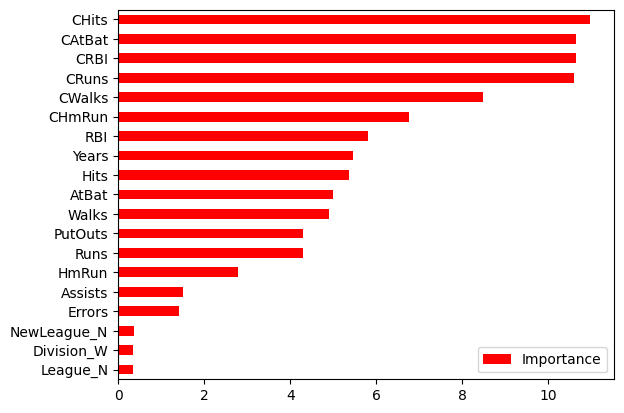

In [67]:
Importance.sort_values(by = "Importance",axis=0,ascending=True).plot(kind="barh",color = "r")